# **IMPORT LIBS**

In [1]:
import pandas as pd
import sys
from collections import Counter

graphs_path = 'Graphs'
sys.path.append(graphs_path)

spotify_path = 'Spotify'
sys.path.append(spotify_path)

graphics_path = 'Graphics'
sys.path.append(graphics_path)

from Graphs.SimpleGraph import SimpleGraph
from Graphs.BipartiteGraph import BipartiteGraph
from Graphics.Graphics import Graphics

# **Auxiliary function to print basic information**

In [2]:
def printBasicInformation(network):
    print(f'Number of nodes: {network.get_number_of_nodes()}')
    print(f'Number of edges: {network.get_number_of_edges()}')
    print(f'Number of components: {network.get_number_connected_components()}')
    print(f'Smallest degree in the network: {network.get_minimum_degree()}')
    print(f'Largest degree in the network: {network.get_maximum_degree()}')
    print(f'Average degree of the network: {network.get_average_degree()}')
    print(f'Network density: {network.get_density()}')

# **Loading the data**

In [3]:
df = pd.read_csv('../data/spotify_artists.csv')
df

,external_urls,followers,genres,id,name,popularity,uri,related_artists_ids
0,https://open.spotify.com/artist/4dpARuHxo51G3z...,57657211,"british soul, pop, pop soul, uk pop",4dpARuHxo51G3z768sgnrY,Adele,86,spotify:artist:4dpARuHxo51G3z768sgnrY,"5WUlDfRSoLAfcVSX1WnrxN, 2wY79sveU1sp5g7SokKOiI..."
1,https://open.spotify.com/artist/66CXWjxzNUsdJx...,98814719,pop,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,91,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR,"4nDoRrQiYLoBzwC5BhVJzF, 0C8ZW7ezQVs4URX5aX7Kqx..."
2,https://open.spotify.com/artist/13ubrt8QOOCPlj...,14722549,"east coast hip hop, hip hop, rap",13ubrt8QOOCPljQ2FL1Kca,A$AP Rocky,84,spotify:artist:13ubrt8QOOCPljQ2FL1Kca,"5dHt1vcEm9qb8fCyLcB3HL, 2P5sC9cVZDToPxyomzF1UH..."
3,https://open.spotify.com/artist/06HL4z0CvFAxyc...,118971229,pop,06HL4z0CvFAxyc27GXpf02,Taylor Swift,100,spotify:artist:06HL4z0CvFAxyc27GXpf02,"0C8ZW7ezQVs4URX5aX7Kqx, 1McMsnEElThX1knmY4oliG..."
4,https://open.spotify.com/artist/7Ln80lUS6He07X...,25991892,"garage rock, modern rock, permanent wave, rock...",7Ln80lUS6He07XvHI8qqHH,Arctic Monkeys,85,spotify:artist:7Ln80lUS6He07XvHI8qqHH,"77SW9BnxLY8rJ0RciFqkHh, 0epOFNiUfyON9EYx7Tpr6V..."
...,...,...,...,...,...,...,...,...
14783,https://open.spotify.com/artist/7EyzyrMNgqiK8b...,1417807,rap mineiro,7EyzyrMNgqiK8bMrbkOT9l,Sidoka,59,spotify:artist:7EyzyrMNgqiK8bMrbkOT9l,"4oPnjkJcLqOim9KJxvIYMz, 1QBWA6tuiZ0JuDluPqbe71..."
14784,https://open.spotify.com/artist/6gzXCdfYfFe5XK...,2313438,"k-pop, k-pop boy group",6gzXCdfYfFe5XKhPKkYqxV,SUPER JUNIOR,58,spotify:artist:6gzXCdfYfFe5XKhPKkYqxV,"6nVMMEywS5Y4tsHPKx1nIo, 1bkpTEmumLC3xc7HgMsttU..."
14785,https://open.spotify.com/artist/7AAXcP4NpvvLM9...,609413,"sertanejo, sertanejo universitario",7AAXcP4NpvvLM9Xcfy64ij,Hugo Pena & Gabriel,40,spotify:artist:7AAXcP4NpvvLM9Xcfy64ij,"5Dyg6H3QJHQV5c7ojyKWyv, 4ZUahcHoVxr4lsrfdmhjhV..."
14786,https://open.spotify.com/artist/5KvkOKroKLz202...,186296,"folk metal, german metal, melodic death metal,...",5KvkOKroKLz202ioXfGWR2,Equilibrium,49,spotify:artist:5KvkOKroKLz202ioXfGWR2,3t5X2CVDf5mrlIx1SdvWYM


# **Creating the complex network related to the Popularity Recommender**



## **Creating the Bipartite Network (genres and artists)**

In [4]:
edges = []
for i in range(len(df)):
    genres_artist = df['genres'][i].split(', ')
    for g in genres_artist:
        edge = (df['id'][i], g, df['popularity'][i])
        edges.append(edge)

In [5]:
artists_nodes = [(df['id'][index], dict(popularity=int(df['popularity'][index]), name=str(df['name'][index]), genre=str(df['genres'][index].split(', ')[0]))) for index in range(len(df['id']))]
genres_nodes = set([item.strip() for sublist in df['genres'].dropna().apply(lambda x: x.split(',')) for item in sublist])

In [6]:
Bipartite_G = BipartiteGraph()
Bipartite_G.add_nodes(artists_nodes, genres_nodes)
Bipartite_G.add_edges(edges)

## **Creating the Simple Network (artists)**

* **To analyze the network, we will not consider the vertices that represent genres, as the bipartite format was used solely to facilitate the recommendation process. Thus, to simplify the analysis, we will create a network, derived from the bipartite one, where all vertices connected through a genre are linked to each other, with the weight of these connections set to 1**

In [7]:
G_from_Bipartite = Bipartite_G.transform_bipartite_into_simple(list(df['id']))
name_network = 'network_from_Popularity_Recommender'

## **Analyzing the network**

### **Basic information**

In [8]:
printBasicInformation(G_from_Bipartite)

Number of nodes: 14788
Number of edges: 774610
Number of components: 118
Smallest degree in the network: 1
Largest degree in the network: 768
Average degree of the network: 104.76196916418718
Network density: 0.0070847345076206925


### **Degree distribution**

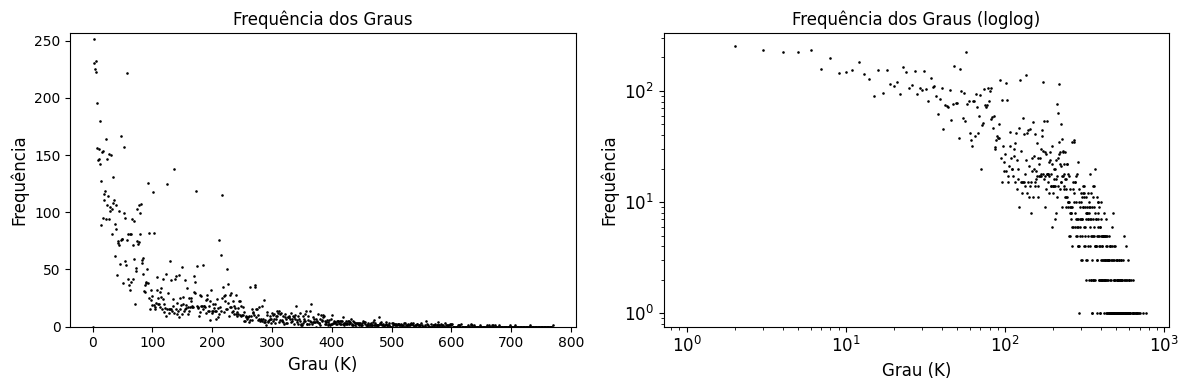

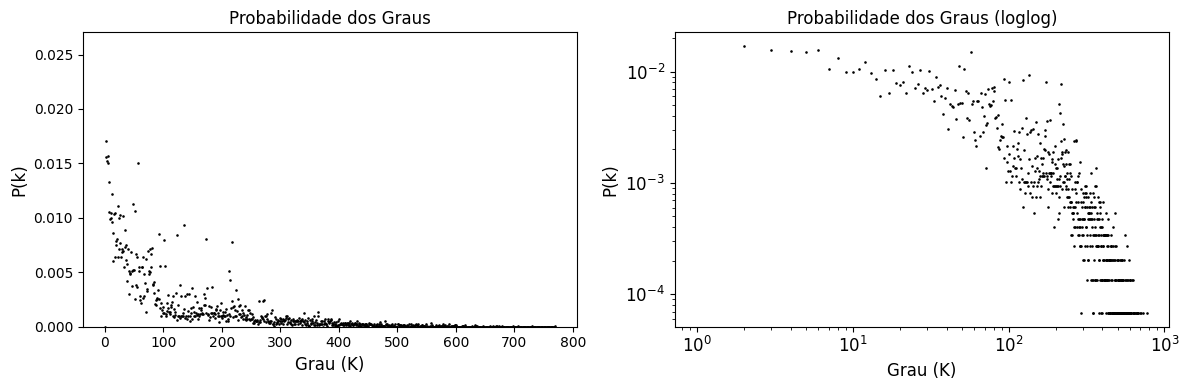

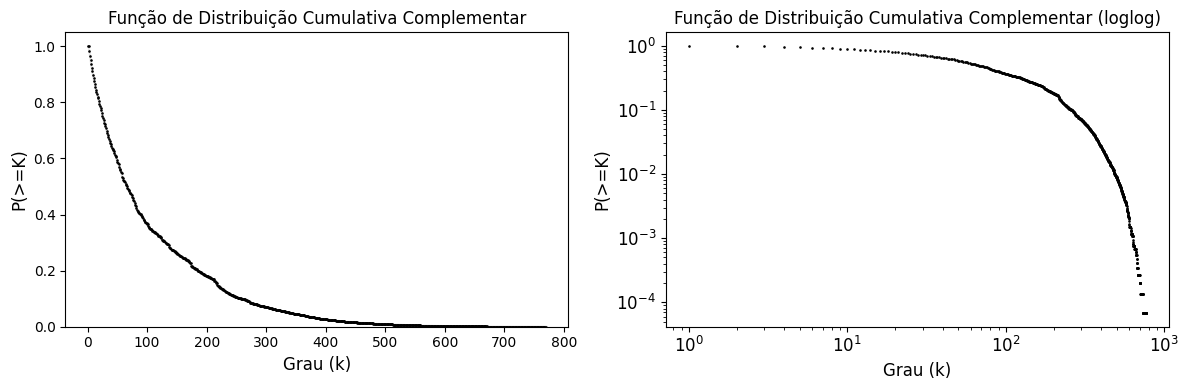

In [9]:
frequencies_of_degrees, probability_of_degrees, accumulated_probability_of_degress = G_from_Bipartite.get_degree_distribution()
Graphics.create_graphic_degrees(data = frequencies_of_degrees, xLabel = 'Grau (K)', yLabel = 'Frequência', title = 'Frequência dos Graus', limit = 5, lines = False, name_network = name_network)
Graphics.create_graphic_degrees(data = probability_of_degrees, xLabel = 'Grau (K)', yLabel = 'P(k)', title = 'Probabilidade dos Graus', limit = 0.01, lines = False,  name_network = name_network)
Graphics.create_graphic_degrees(data = accumulated_probability_of_degress, xLabel = 'Grau (k)', yLabel = 'P(>=K)', title = 'Função de Distribuição Cumulativa Complementar', limit = 0.05, lines = True,  name_network = name_network)

### **Centralities**

#### **Degree Centrality**

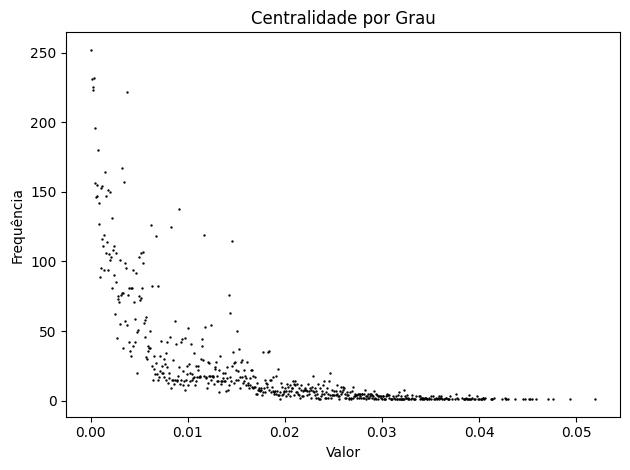

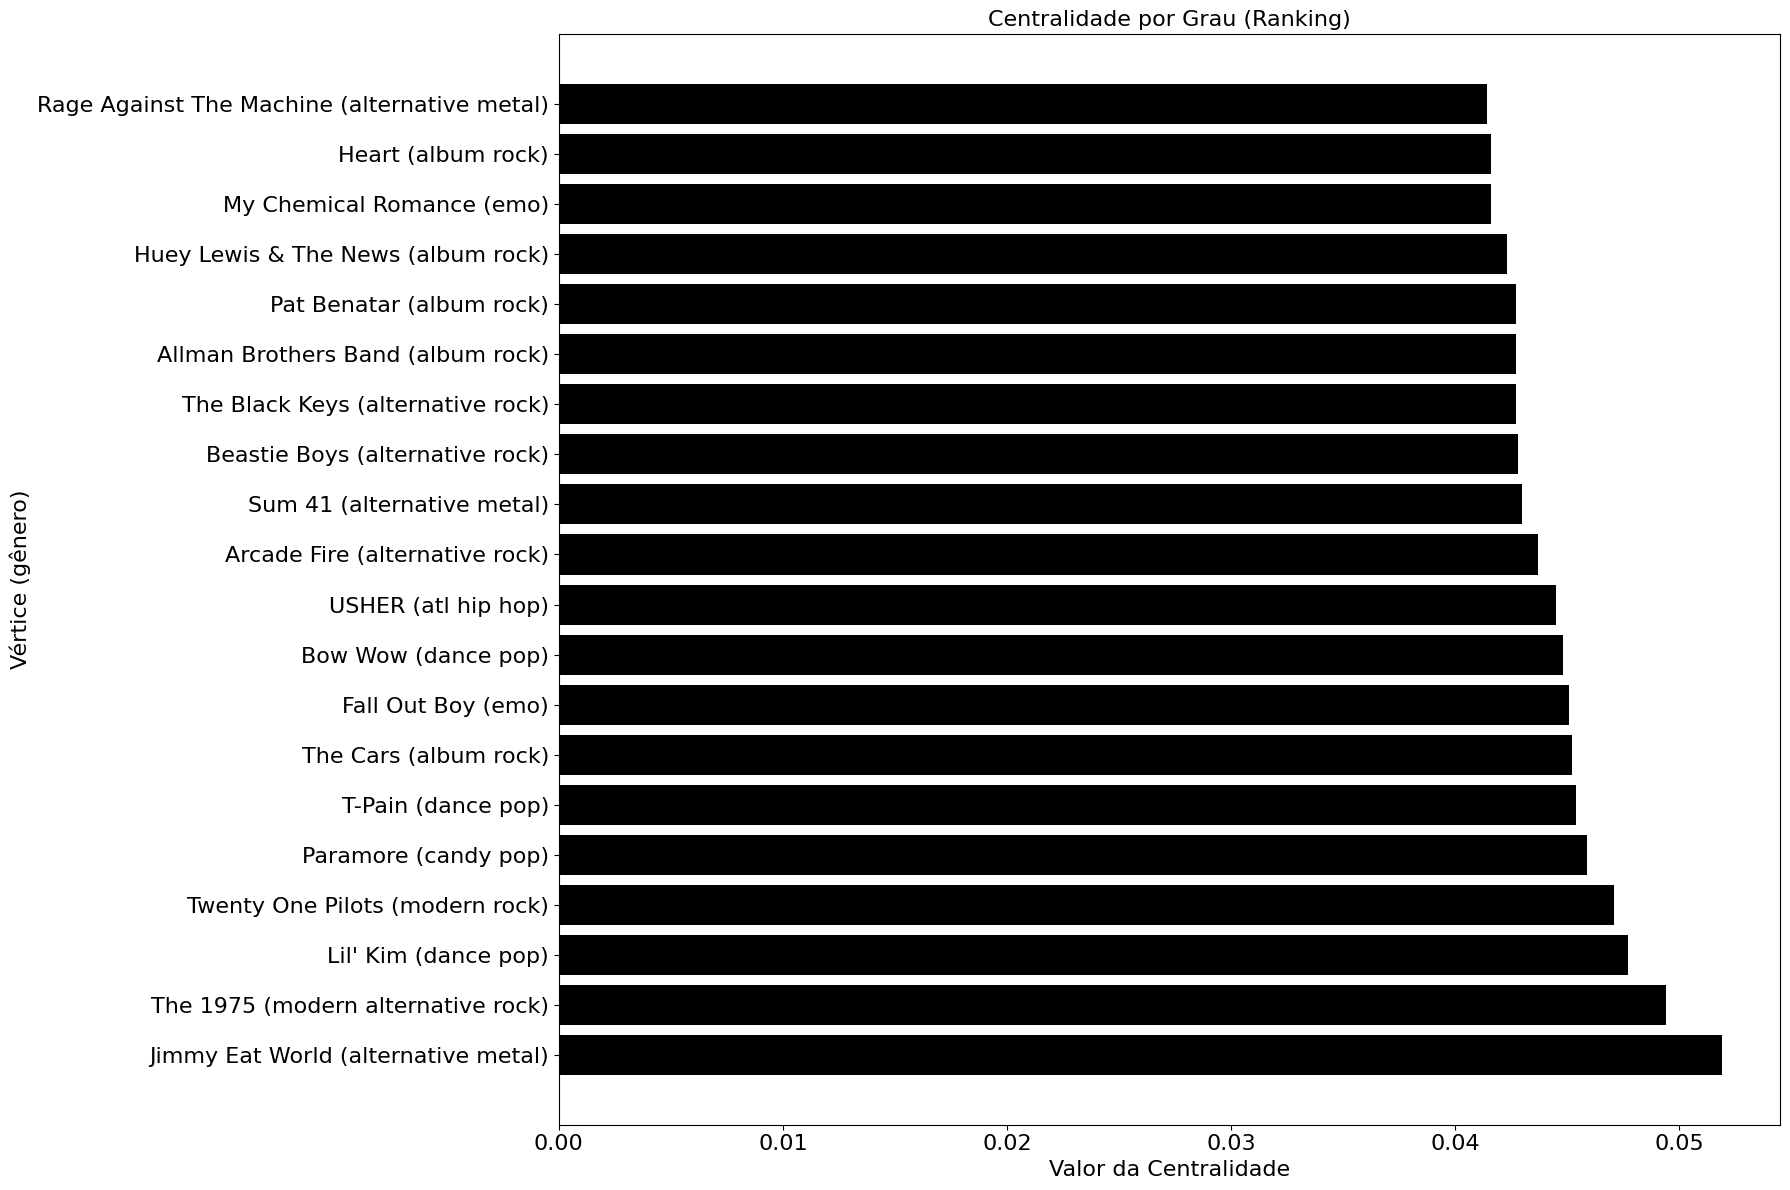

In [10]:
degree_centrality = G_from_Bipartite.get_degree_centrality()
analysis_centrality=Graphics.create_graphic_centrality(data=degree_centrality, title='Centralidade por Grau', name_network=name_network)
Graphics.create_ranking_centrality(centrality=degree_centrality, graph=G_from_Bipartite, title='Centralidade por Grau (Ranking)', name_network=name_network, label='genre')

#### **Eigenvector Centrality**

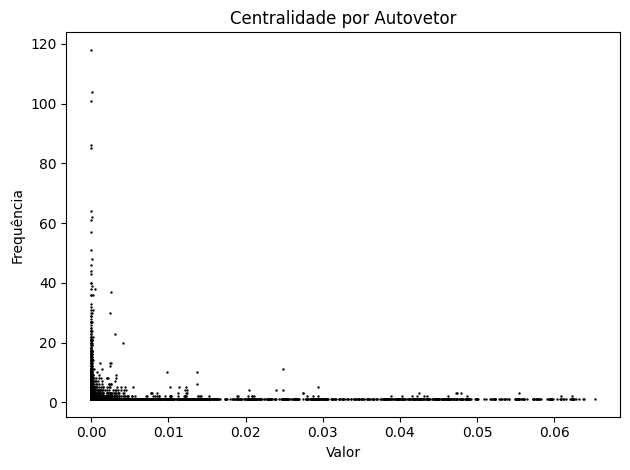

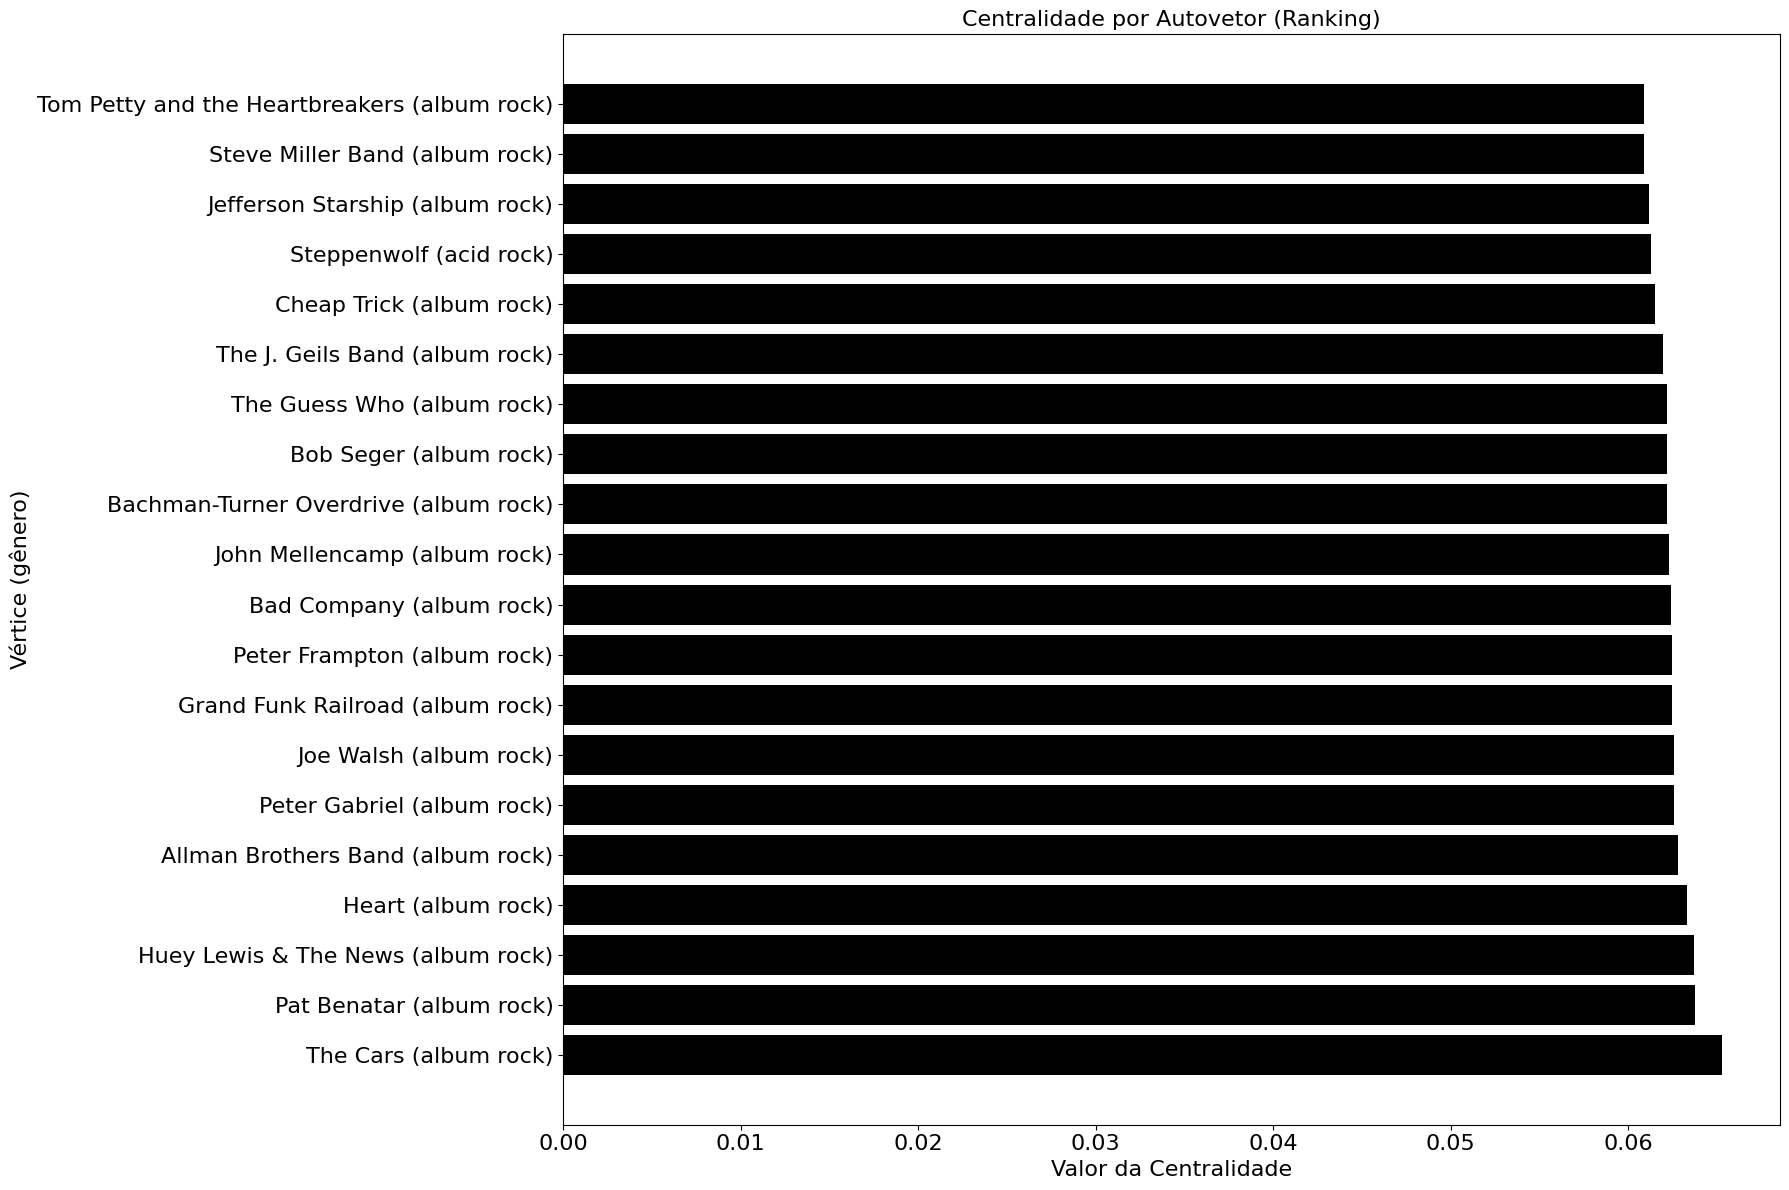

In [11]:
eigenvector_centrality = G_from_Bipartite.get_eigenvector_centrality()
analysis_centrality=Graphics.create_graphic_centrality(data=eigenvector_centrality, title='Centralidade por Autovetor', name_network=name_network)
Graphics.create_ranking_centrality(centrality=eigenvector_centrality, graph=G_from_Bipartite, title='Centralidade por Autovetor (Ranking)', name_network=name_network, label='genre')

### **Communities**

In [12]:
louvain_communities = G_from_Bipartite.get_louvain_communities()
sorted_louvain_communities = sorted(louvain_communities, key=len, reverse=True)

In [13]:
for index, community in enumerate(sorted_louvain_communities):
    print(f'Community {index:2}', end=' ')
    community_list = []
    for artist_id in community:
        community_list.append(G_from_Bipartite.graph.nodes[artist_id]['name'])
    print(f'(size: {len(community_list):4}): ', ' | '.join(community_list))

Community  0 (size: 2264):  Nate Ruess | Enter Shikari | The Devil Makes Three | Pixies | Urban Heat | The Damned | Glen Hansard | Peter, Paul and Mary | Greta Van Fleet | Staind | Opeth | The Vapors | Sade | Local Natives | Ween | Fear, and Loathing in Las Vegas | Pennywise | Oberhofer | Barenaked Ladies | The Cult | Yes Ma'am | Geotic | Living Colour | KMFDM | Woody Guthrie | Christine and the Queens | Andrew Belle | The Used | Operation Ivy | Great Lake Swimmers | VCTMS | Billy Bragg | Them | Allison Russell | Of Virtue | Blanco White | CKY | Nails | Firefall | The Goo Goo Dolls | Lucinda Williams | Wunderhorse | Nym | Microwave | The Civil Wars | Novo Amor | Placebo | PNAU | Seals and Crofts | AFI | Until I Wake | Turnover | The Red Jumpsuit Apparatus | Sevendust | John Waite | Gregg Allman | Vashti Bunyan | Highly Suspect | Bryan Ferry | Lacey Sturm | Erasure | Violet Orlandi | Testament | Tom Petty | Rodney Crowell | Friday Pilots Club | The Waterboys | Little Dragon | Godsmack |

### **Analyzing centrality in some previous communities**

#### **Auxiliary function**

In [14]:
def create_newtok_based_on_a_community(graph, nodes_community):
    edges_community_aux = []
    
    for i in range(len(nodes_community)):
        for j in range(i+1, len(nodes_community)):
            if graph.graph.has_edge(nodes_community[i], nodes_community[j]) or graph.graph.has_edge(nodes_community[j], nodes_community[i]):    
                artist_1, artist_2 = (nodes_community[i], nodes_community[j]) if nodes_community[i] < nodes_community[j] else (nodes_community[j], nodes_community[i])
                edges_community_aux.append((artist_1, artist_2))
    
    counter = Counter(edges_community_aux)
    edges_community = []
    
    for artists, weight in counter.items():
        artist_1, artist_2 = artists
        edges_community.append((artist_1, artist_2, weight))

    G_Community = SimpleGraph()
    G_Community.add_nodes(nodes_community)
    G_Community.add_edges(edges_community)

    return G_Community


#### **Community 1**

In [15]:
number_community = 1
nodes_community = list(sorted_louvain_communities[number_community])
G_Community_1 = create_newtok_based_on_a_community(G_from_Bipartite, nodes_community)

##### **Basic information**

In [16]:
printBasicInformation(G_Community_1)

Number of nodes: 1211
Number of edges: 74250
Number of components: 1
Smallest degree in the network: 1
Largest degree in the network: 471
Average degree of the network: 122.62592898431049
Network density: 0.10134374296224007


##### **Degree Centrality**

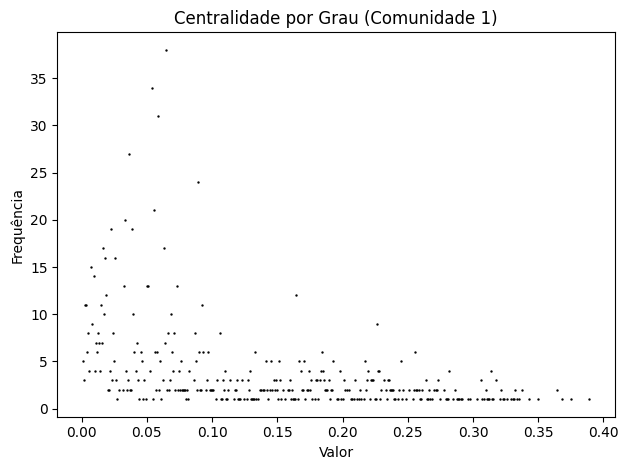

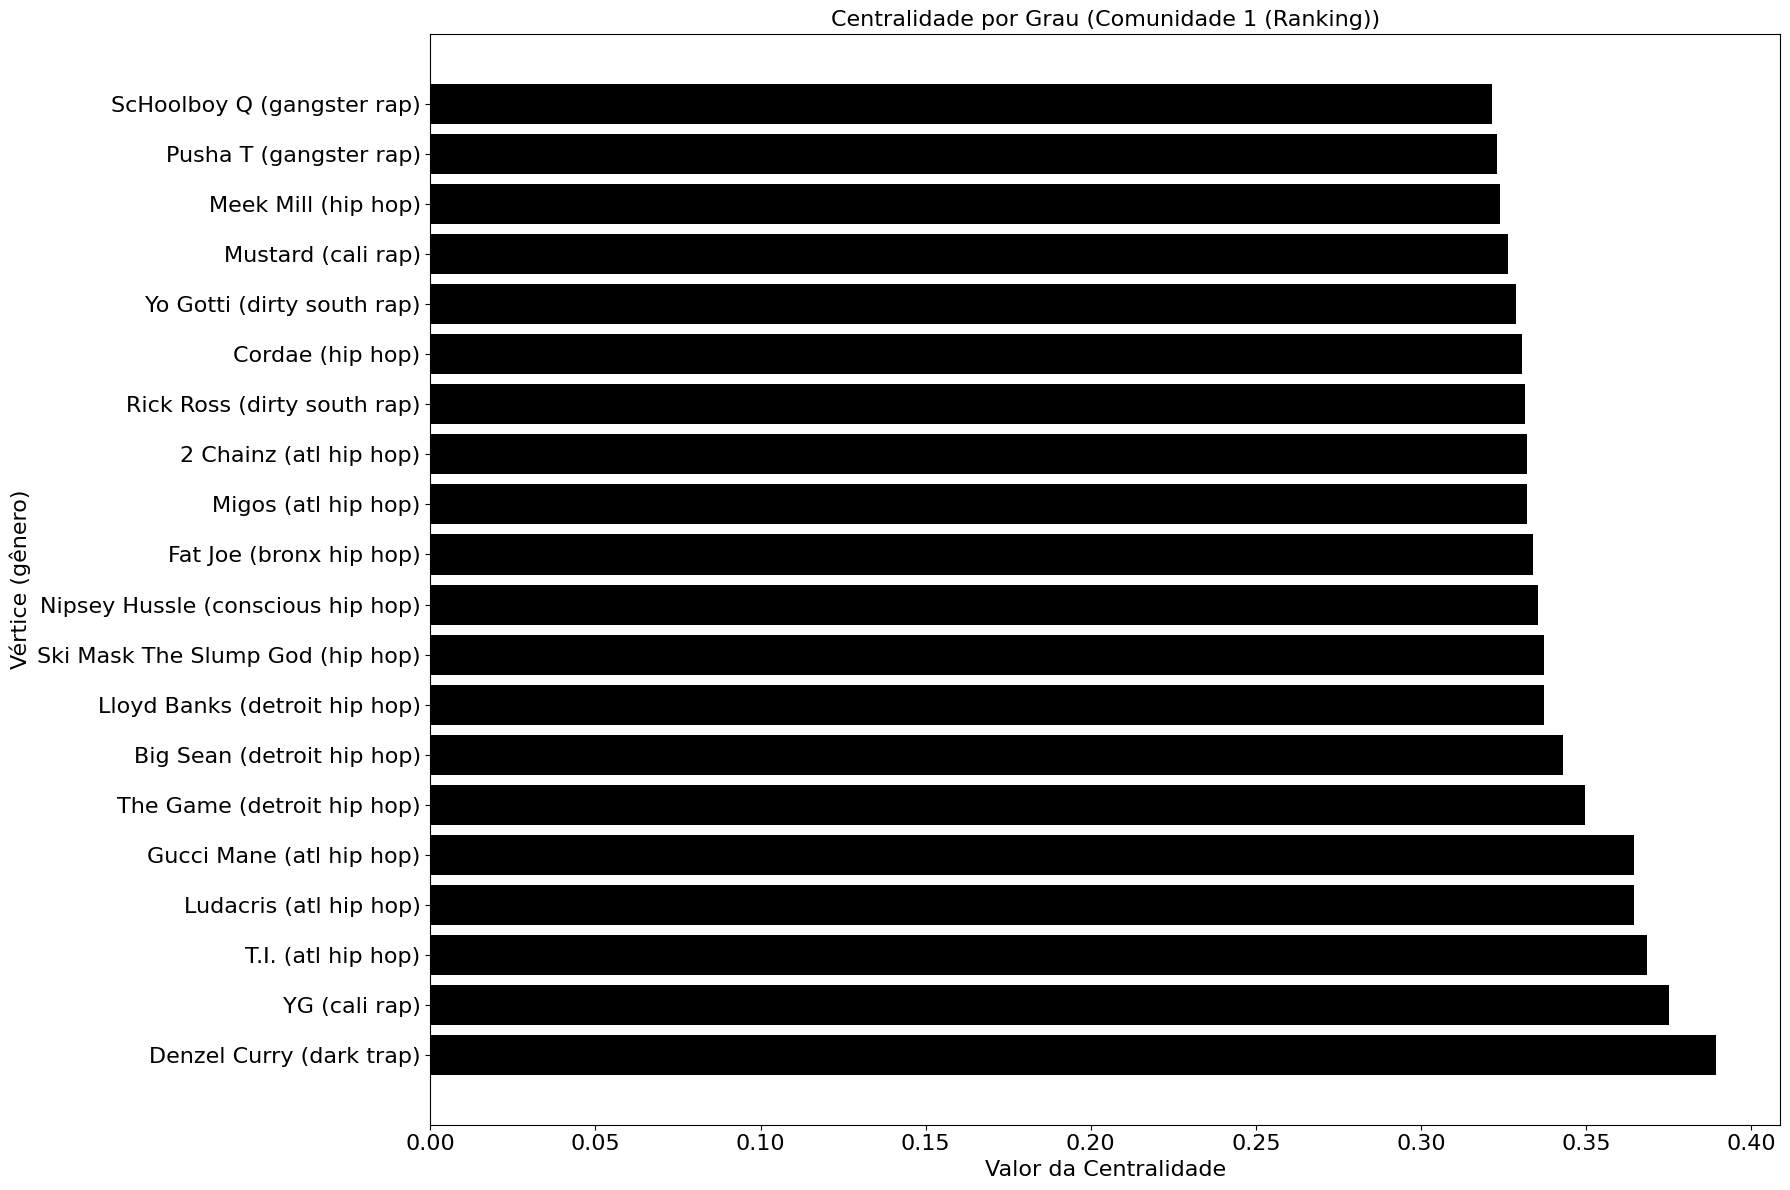

In [17]:
degree_centrality = G_Community_1.get_degree_centrality()
analysis_centrality = Graphics.create_graphic_centrality(data=degree_centrality, title=f'Centralidade por Grau (Comunidade {number_community})', name_network=f'{name_network}_community_{number_community}')
Graphics.create_ranking_centrality(centrality=degree_centrality, graph=G_from_Bipartite, title=f'Centralidade por Grau (Comunidade {number_community} (Ranking))', name_network=f'{name_network}_community_{number_community}', label='genre')

##### **Eigenvector Centrality**

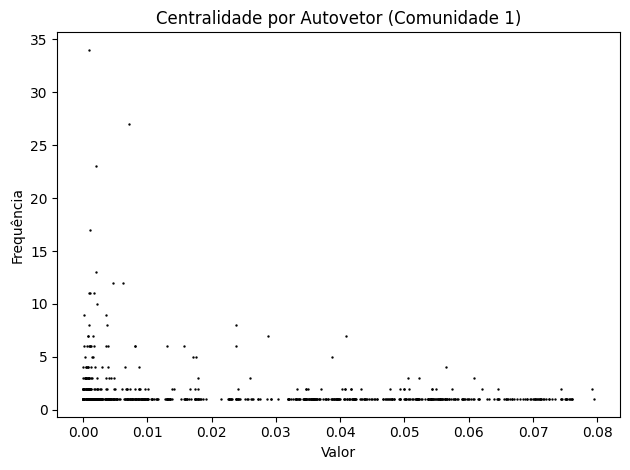

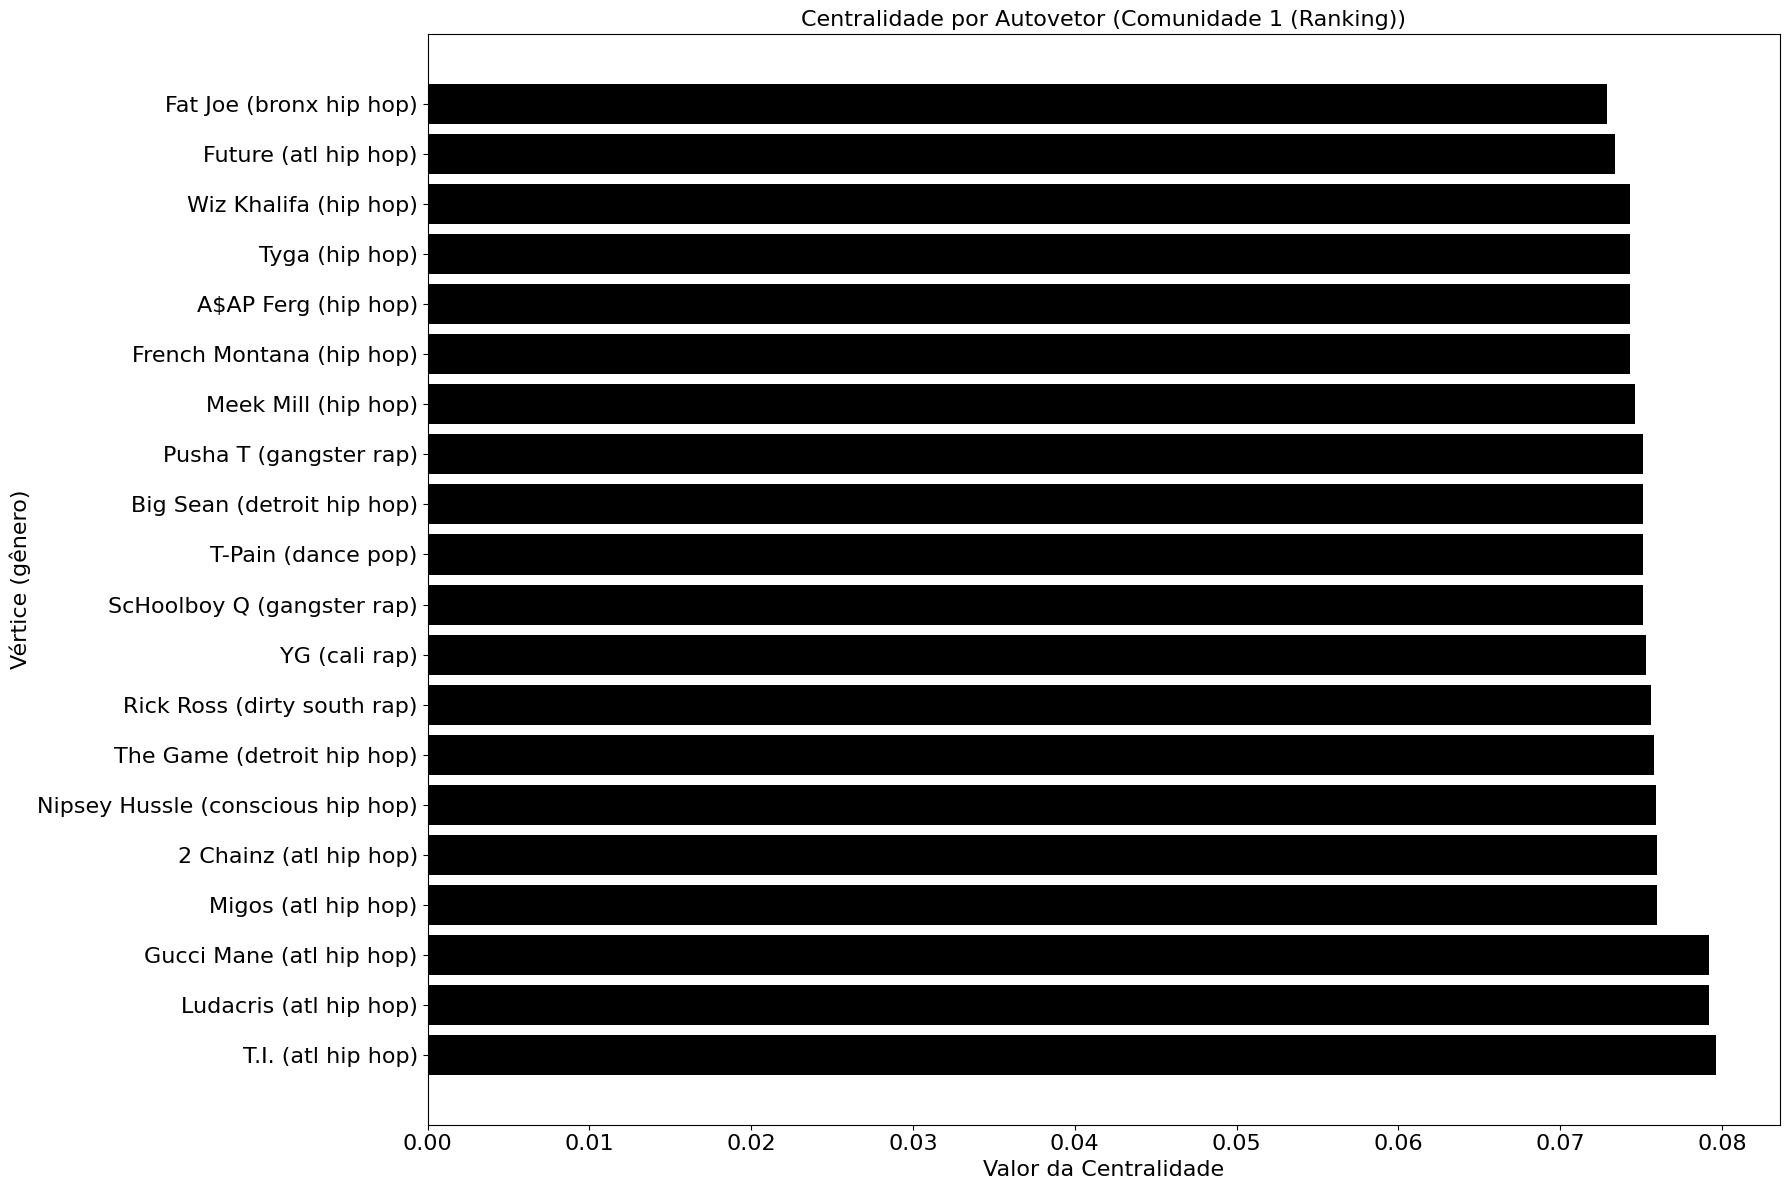

In [18]:
eigenvector_centrality = G_Community_1.get_eigenvector_centrality()
analysis_centrality=Graphics.create_graphic_centrality(data=eigenvector_centrality, title=f'Centralidade por Autovetor (Comunidade {number_community})', name_network=f'{name_network}_community_{number_community}')
Graphics.create_ranking_centrality(centrality=eigenvector_centrality, graph=G_from_Bipartite, title=f'Centralidade por Autovetor (Comunidade {number_community} (Ranking))', name_network=f'{name_network}_community_{number_community}', label='genre')

#### **Community 9**

In [19]:
number_community = 9
nodes_community = list(sorted_louvain_communities[number_community])
G_Community_9 = create_newtok_based_on_a_community(G_from_Bipartite, nodes_community)

##### **Basic information**

In [20]:
printBasicInformation(G_Community_9)

Number of nodes: 452
Number of edges: 9857
Number of components: 1
Smallest degree in the network: 1
Largest degree in the network: 157
Average degree of the network: 43.61504424778761
Network density: 0.09670741518356454


##### **Degree Centrality**

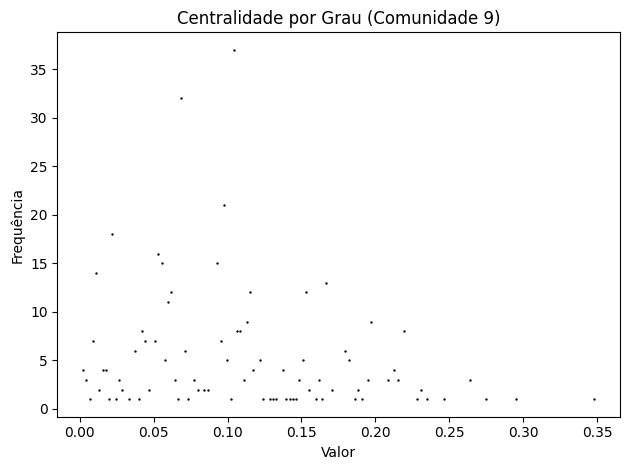

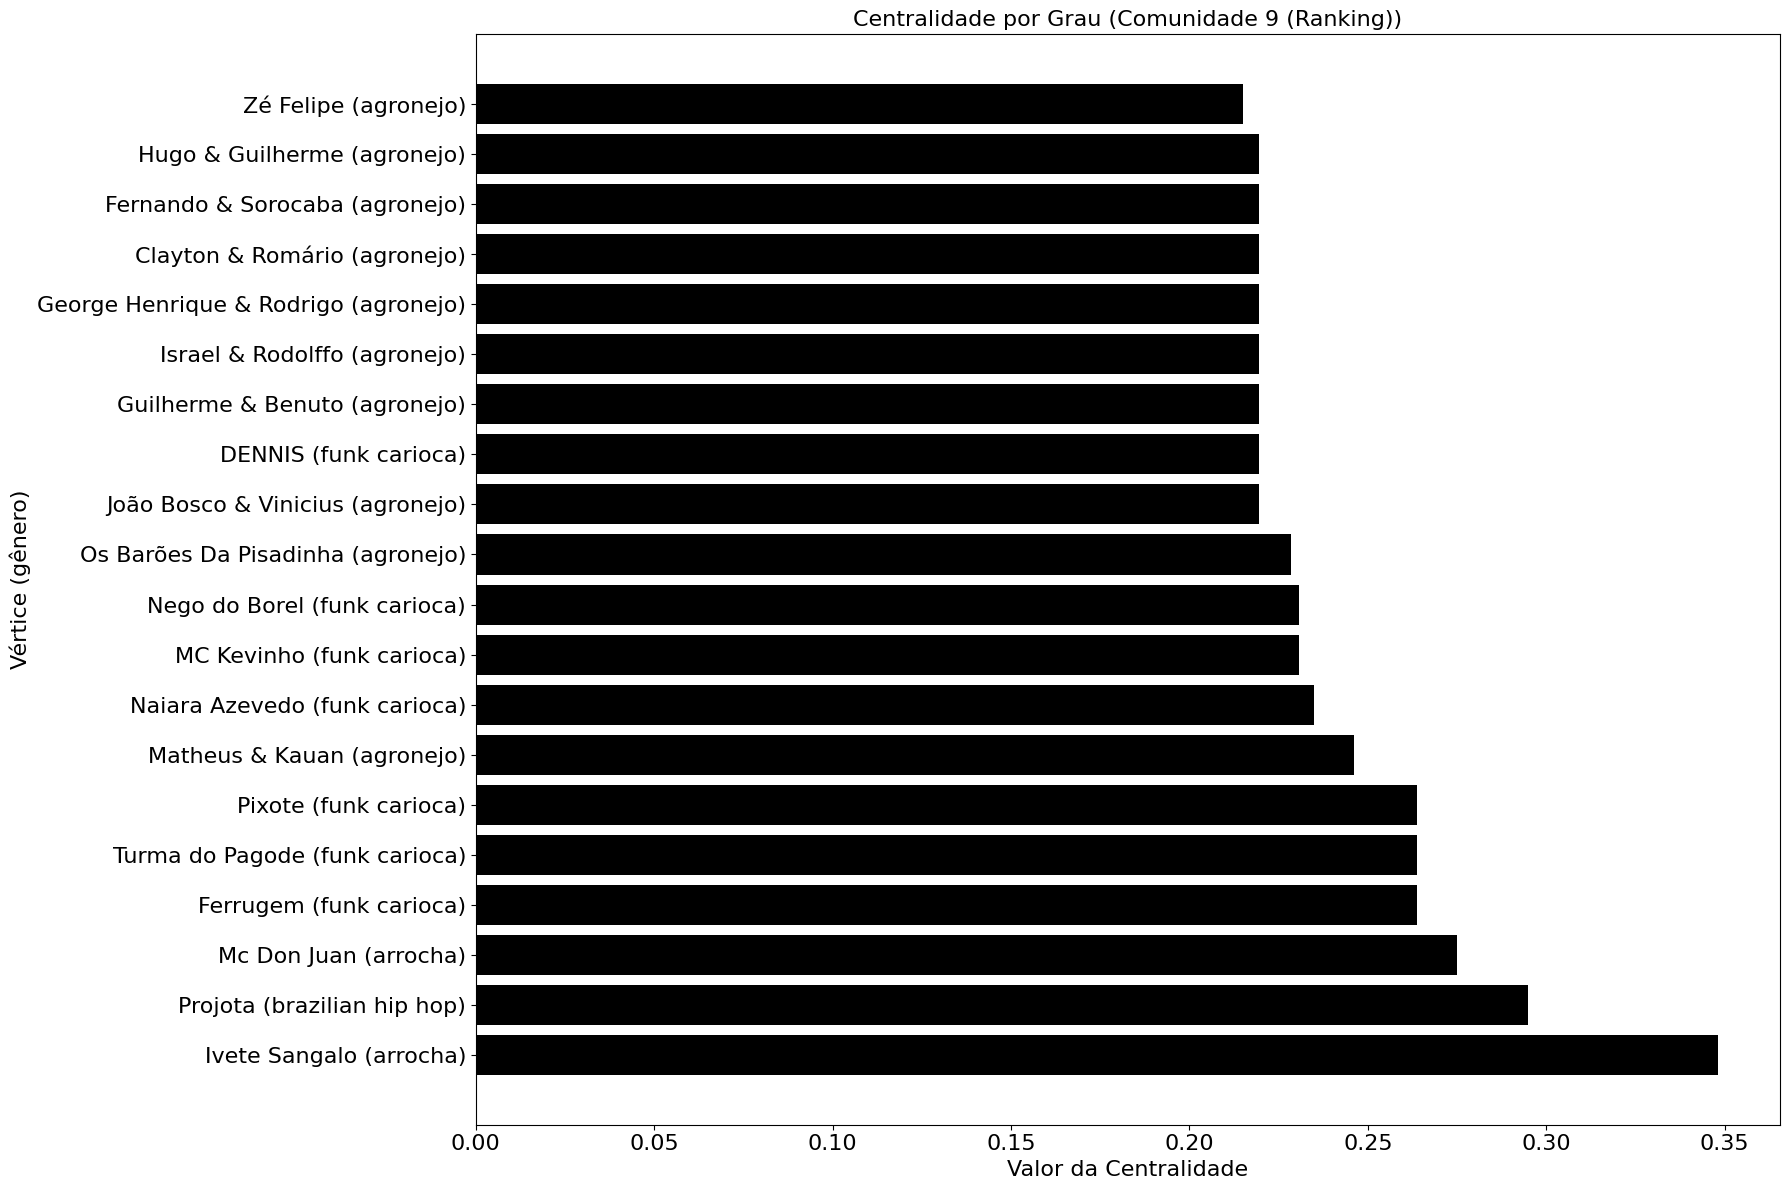

In [21]:
degree_centrality = G_Community_9.get_degree_centrality()
analysis_centrality = Graphics.create_graphic_centrality(data=degree_centrality, title=f'Centralidade por Grau (Comunidade {number_community})', name_network=f'{name_network}_community_{number_community}')
Graphics.create_ranking_centrality(centrality=degree_centrality, graph=G_from_Bipartite, title=f'Centralidade por Grau (Comunidade {number_community} (Ranking))', name_network=f'{name_network}_community_{number_community}', label='genre')

##### **Eigenvector Centrality**

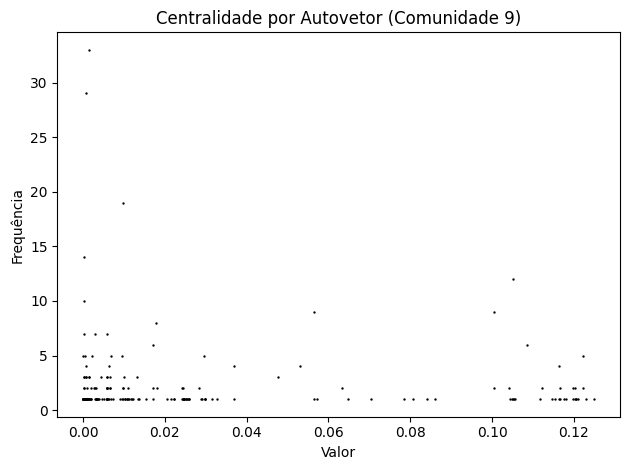

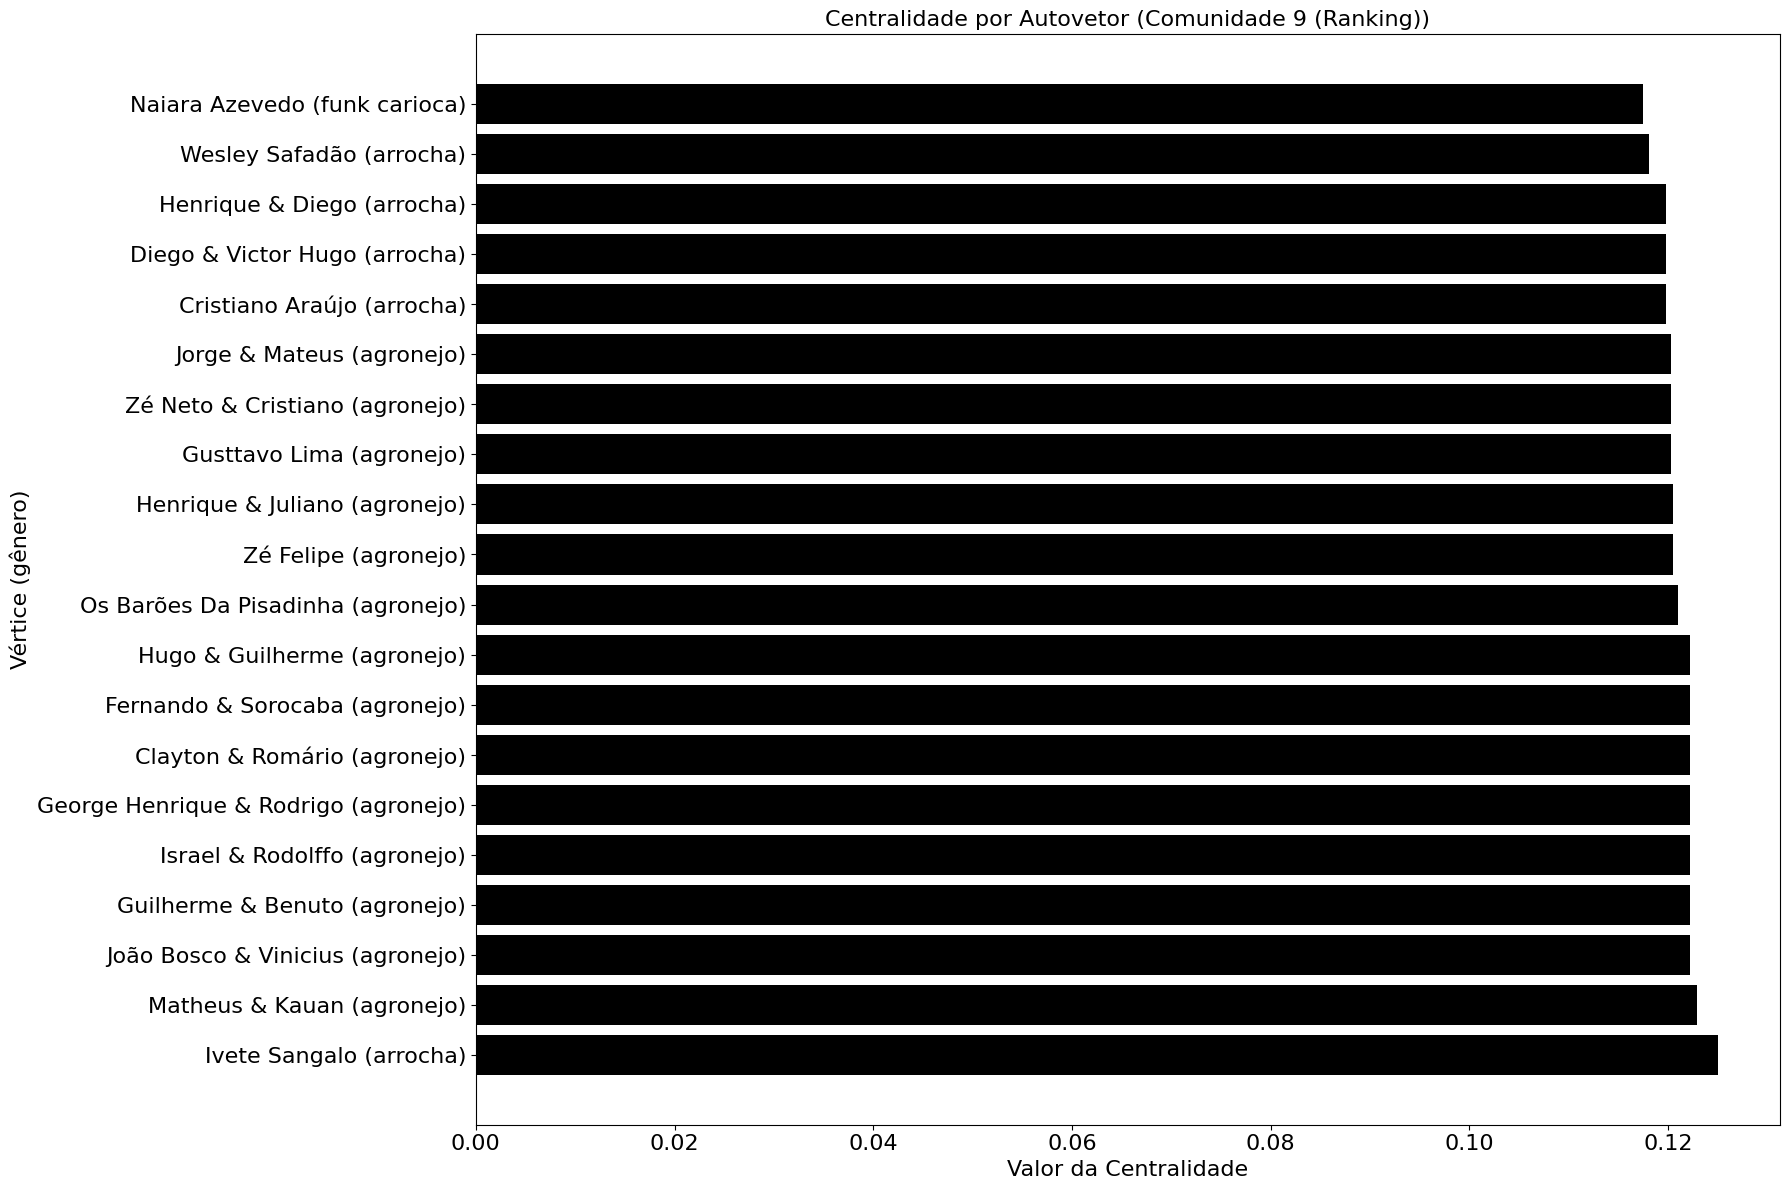

In [22]:
eigenvector_centrality = G_Community_9.get_eigenvector_centrality()
analysis_centrality=Graphics.create_graphic_centrality(data=eigenvector_centrality, title=f'Centralidade por Autovetor (Comunidade {number_community})', name_network=f'{name_network}_community_{number_community}')
Graphics.create_ranking_centrality(centrality=eigenvector_centrality, graph=G_from_Bipartite, title=f'Centralidade por Autovetor (Comunidade {number_community} (Ranking))', name_network=f'{name_network}_community_{number_community}', label='genre')

#### **Community 53**

In [23]:
number_community = 53
nodes_community = list(sorted_louvain_communities[number_community])
G_Community_53 = create_newtok_based_on_a_community(G_from_Bipartite, nodes_community)

##### **Basic information**

In [24]:
printBasicInformation(G_Community_53)

Number of nodes: 7
Number of edges: 21
Number of components: 1
Smallest degree in the network: 6
Largest degree in the network: 6
Average degree of the network: 6.0
Network density: 1.0


##### **Degree Centrality**

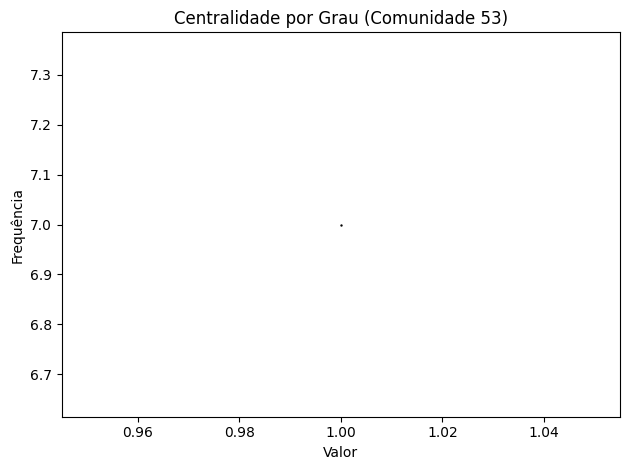

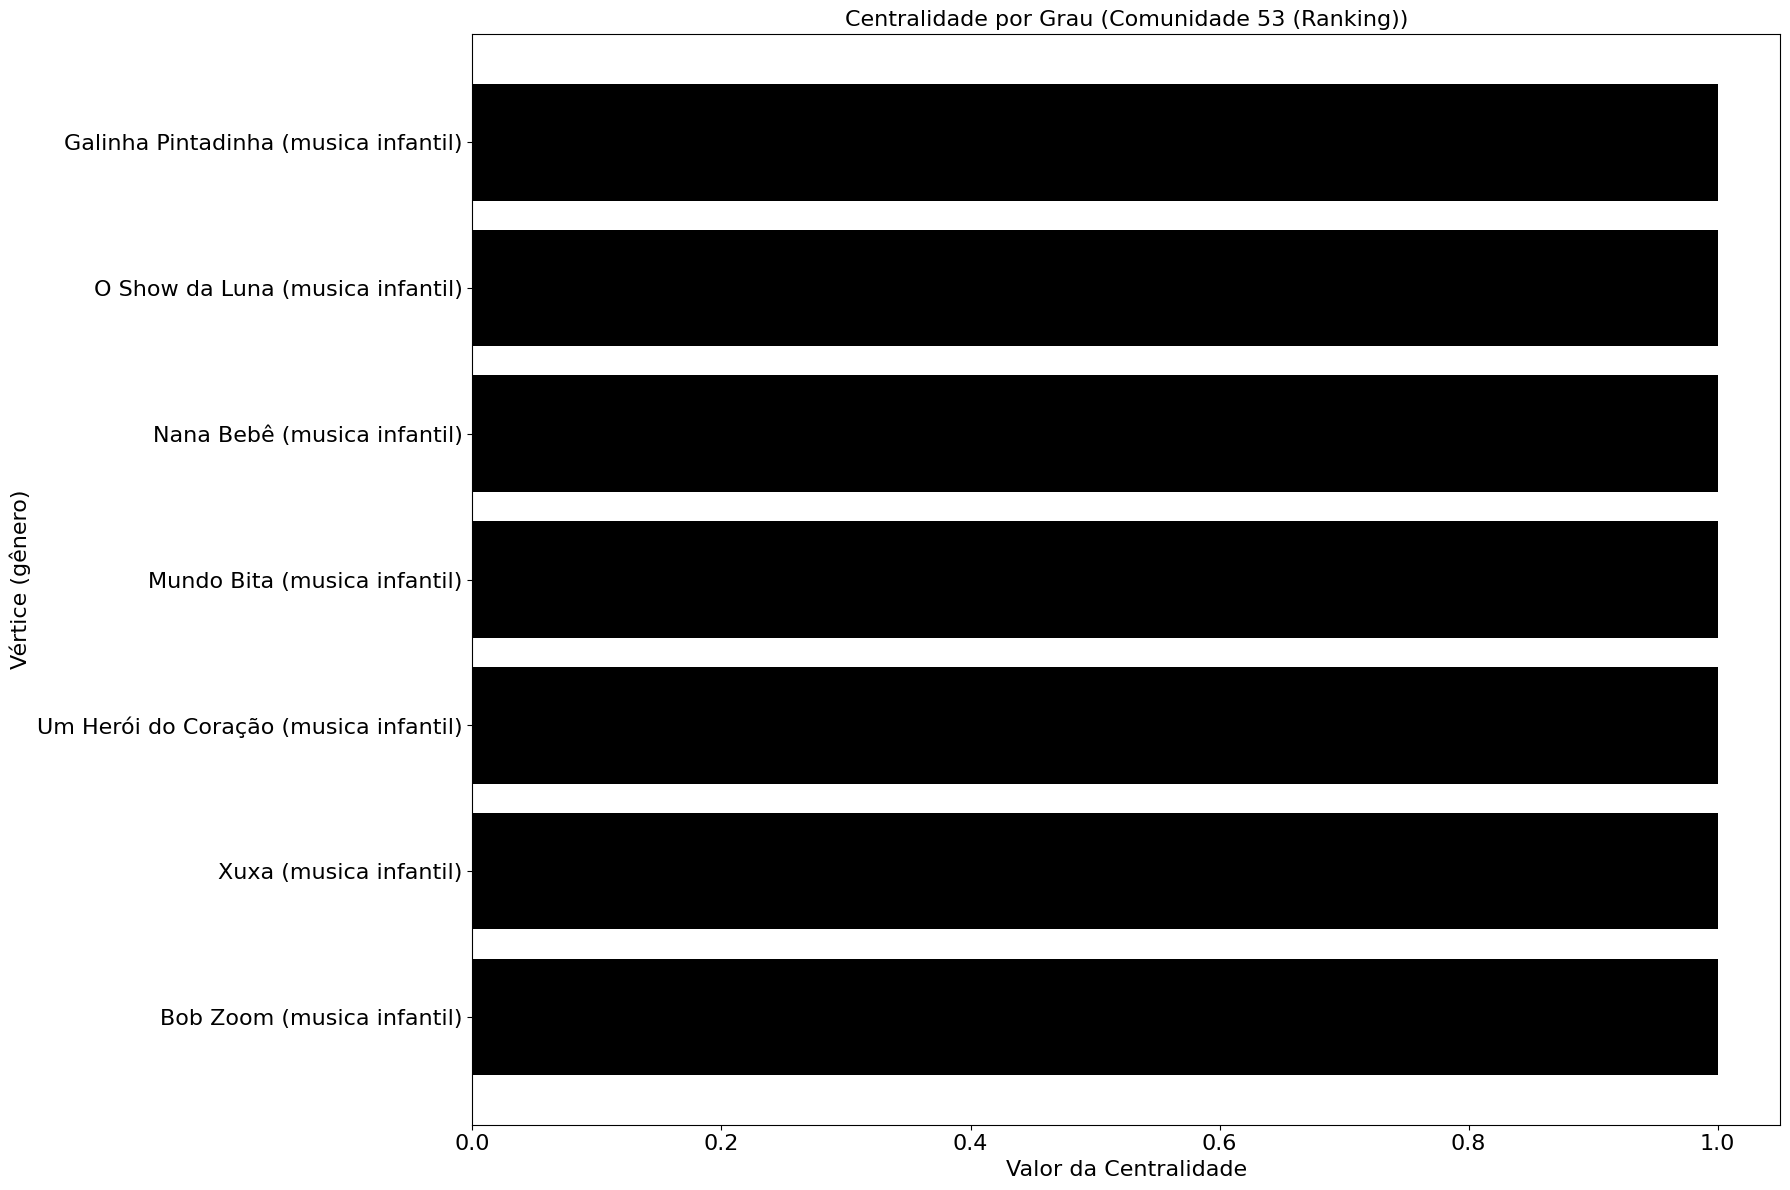

In [25]:
degree_centrality = G_Community_53.get_degree_centrality()
analysis_centrality = Graphics.create_graphic_centrality(data=degree_centrality, title=f'Centralidade por Grau (Comunidade {number_community})', name_network=f'{name_network}_community_{number_community}')
Graphics.create_ranking_centrality(centrality=degree_centrality, graph=G_from_Bipartite, title=f'Centralidade por Grau (Comunidade {number_community} (Ranking))', name_network=f'{name_network}_community_{number_community}', label='genre')

##### **Eigenvector Centrality**

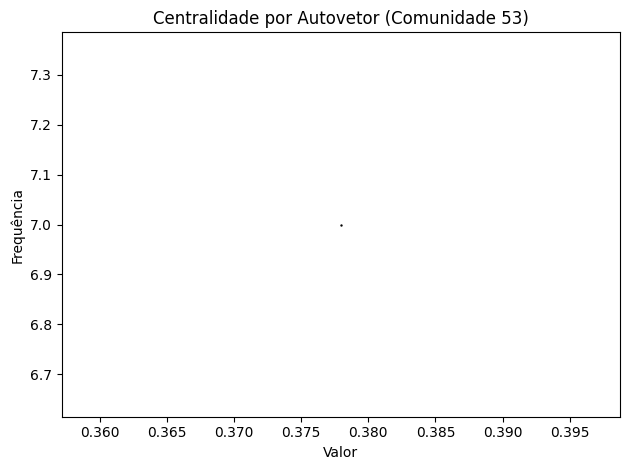

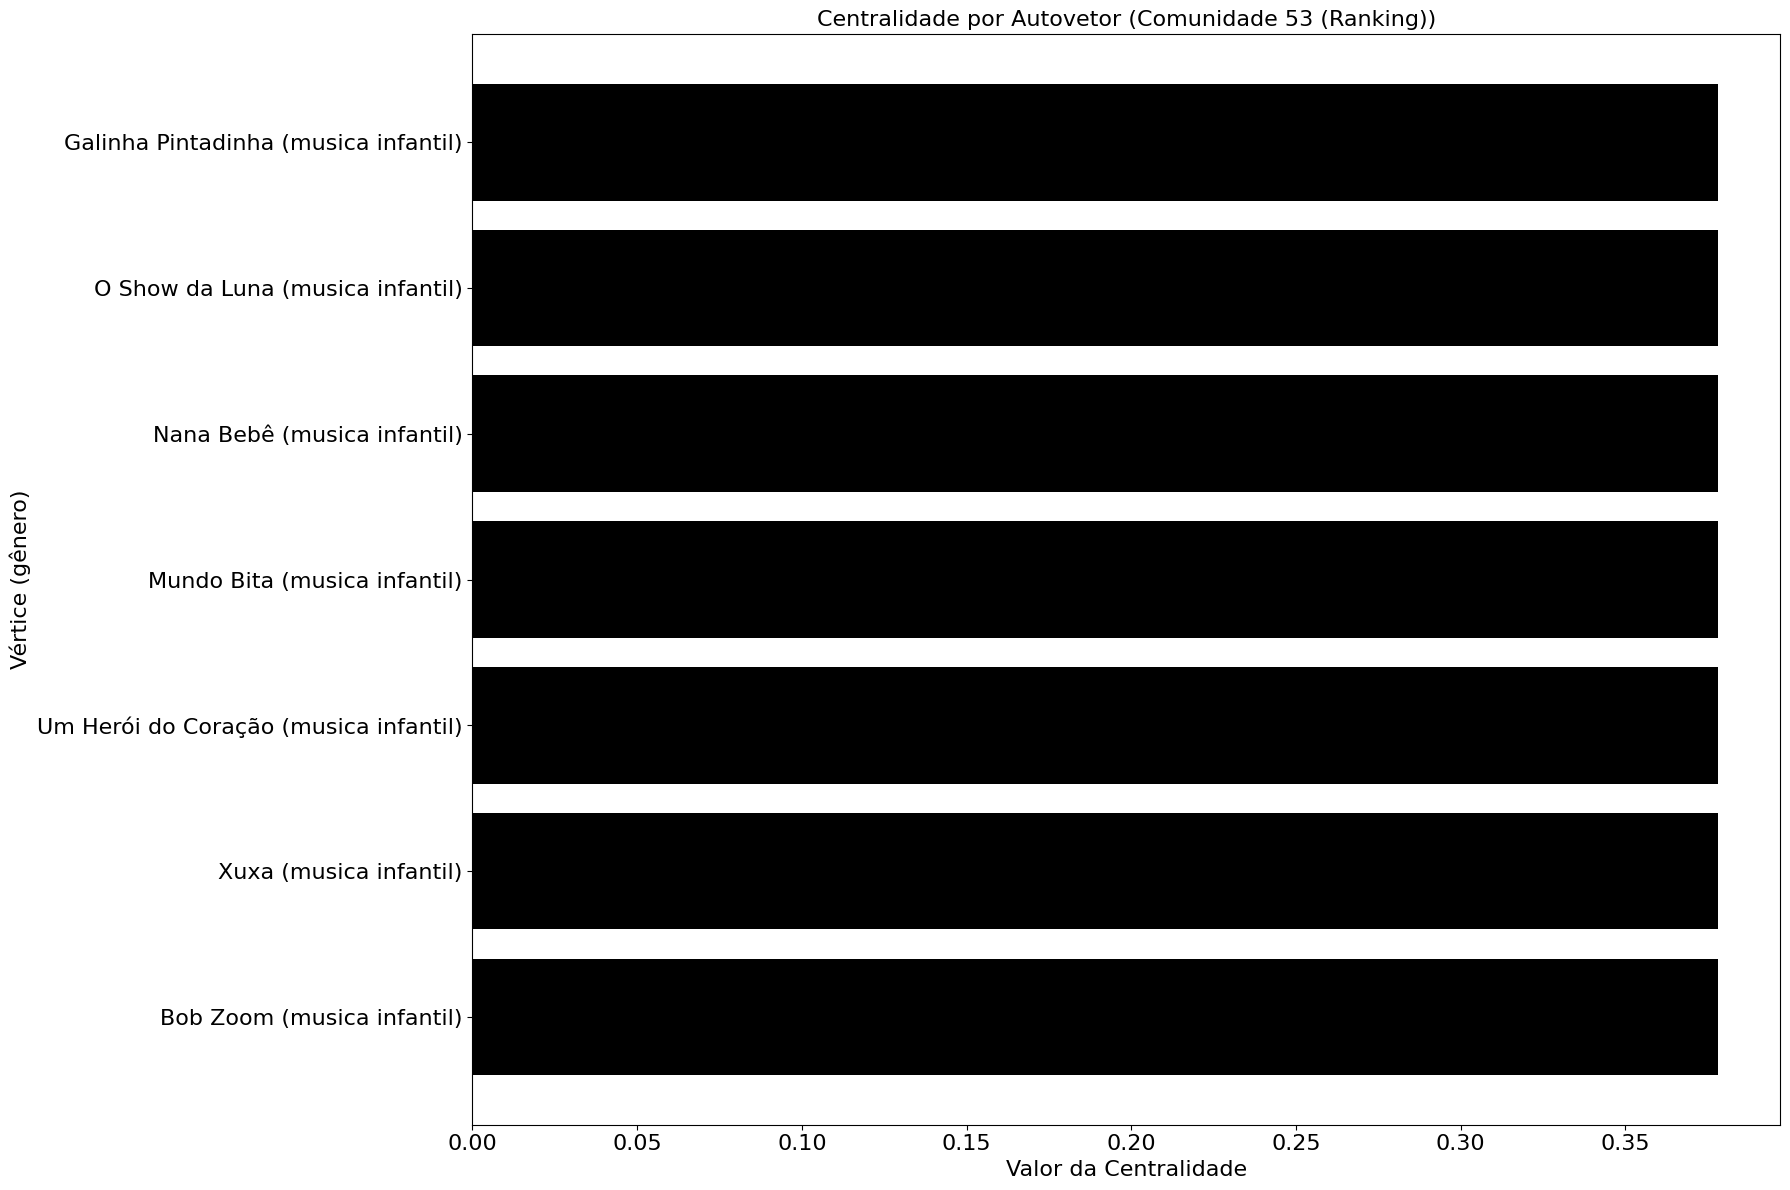

In [26]:
eigenvector_centrality = G_Community_53.get_eigenvector_centrality()
analysis_centrality=Graphics.create_graphic_centrality(data=eigenvector_centrality, title=f'Centralidade por Autovetor (Comunidade {number_community})', name_network=f'{name_network}_community_{number_community}')
Graphics.create_ranking_centrality(centrality=eigenvector_centrality, graph=G_from_Bipartite, title=f'Centralidade por Autovetor (Comunidade {number_community} (Ranking))', name_network=f'{name_network}_community_{number_community}', label='genre')

# **Conclusion**

* **Note that the bipartite graph used in the Popularity Recommender is actually the same graph as the Stronger Connection Recommender but with all edges having a weight of 1. However, it is necessary to consider that for the calculation of eigenvector centrality and for community detection, the weight is taken into account, so there is a difference between the networks.**